<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np

In [2]:
np.random.normal(loc=5, scale=2, size=10) #loc is used to specify the mean and scale the standard deviation

array([6.12990648, 5.11956846, 3.92948186, 4.80868056, 7.78988566,
       0.75362803, 7.31306131, 6.07386579, 6.50010496, 4.05227727])

### 1.2 Visualising the random numbers

In [3]:
import matplotlib
from matplotlib import pyplot as plt

Text(0, 0.5, 'Value of random number')

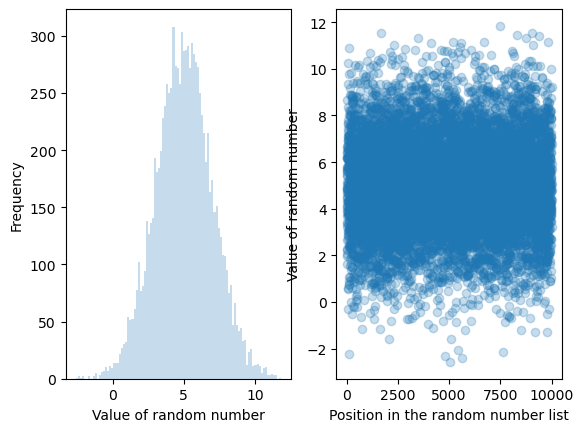

In [4]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [5]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 69.31%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [6]:
# moving only along a ling
# right = p
# left = q = 1-p

### 1.2 The simulation

In [7]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [8]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

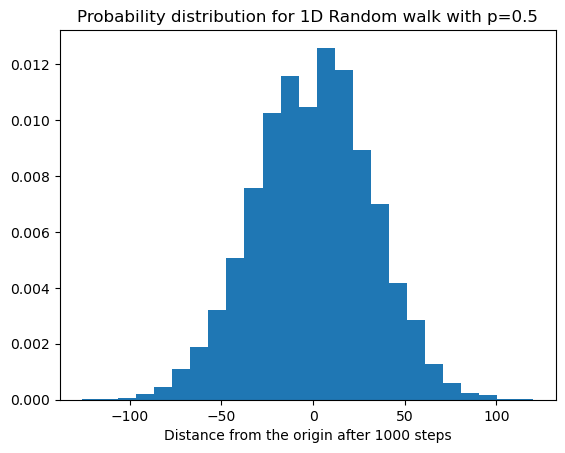

In [9]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

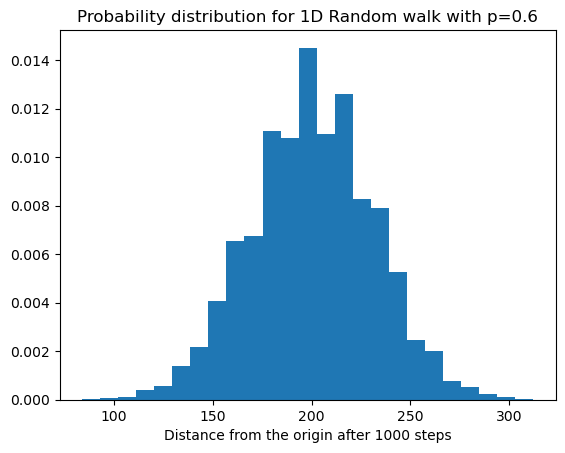

In [10]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [11]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

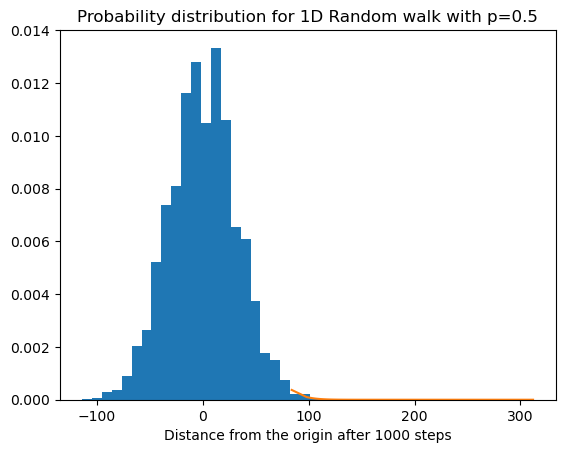

In [12]:
# for large number of steps, Gaussian distribution approximates to Binomial
prob_right=0.5
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

plt.plot(x, normal(x, mean, sd), label='Theoretical')

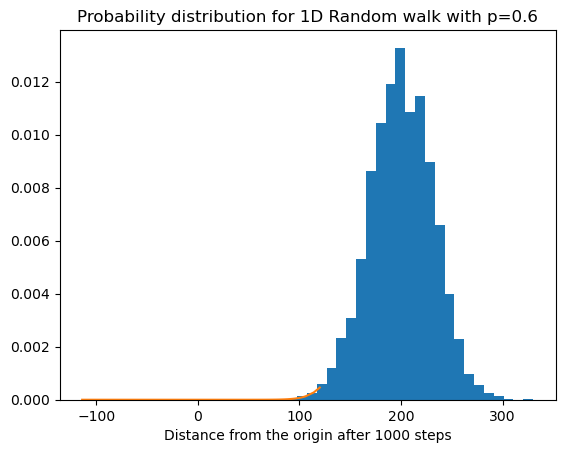

In [13]:
# for large number of steps, Gaussian distribution approximates to Binomial
prob_right=0.6
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

In [14]:
# Take radius of circle = 1
# Circle inscribed on square surface

### 2.2 A poor but intuitive solution

In [15]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13996

### 2.3 A better solution

In [16]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.141864

### 2.4 A smarter solution

In [17]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.143544

## Exercise 1 :  Vital Stats of Random π

In [18]:
#1
def estimate_pi(n):
    N_total=n
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / N_total)

In [19]:
#2
hundred_pi=[estimate_pi(n=10000) for i in range(0,100)]
hundred_pi

[3.1596,
 3.1484,
 3.1608,
 3.1412,
 3.1116,
 3.148,
 3.0944,
 3.1076,
 3.1724,
 3.1576,
 3.1096,
 3.112,
 3.1632,
 3.1432,
 3.1224,
 3.148,
 3.1356,
 3.1388,
 3.15,
 3.1368,
 3.134,
 3.1228,
 3.132,
 3.1292,
 3.1716,
 3.1472,
 3.1376,
 3.1564,
 3.1432,
 3.1288,
 3.14,
 3.1596,
 3.1208,
 3.1312,
 3.1664,
 3.1372,
 3.1232,
 3.1788,
 3.1684,
 3.126,
 3.15,
 3.1576,
 3.1404,
 3.1348,
 3.1308,
 3.12,
 3.1664,
 3.1608,
 3.1684,
 3.1176,
 3.1384,
 3.136,
 3.1532,
 3.1768,
 3.1368,
 3.14,
 3.1368,
 3.1512,
 3.13,
 3.1376,
 3.1436,
 3.1508,
 3.1368,
 3.1332,
 3.1232,
 3.12,
 3.1364,
 3.1356,
 3.1364,
 3.1632,
 3.1576,
 3.1204,
 3.1568,
 3.1536,
 3.1564,
 3.1288,
 3.1452,
 3.1324,
 3.1288,
 3.1432,
 3.1264,
 3.1316,
 3.1308,
 3.1348,
 3.1584,
 3.122,
 3.1352,
 3.132,
 3.1424,
 3.1344,
 3.1596,
 3.1536,
 3.1384,
 3.162,
 3.1512,
 3.138,
 3.1608,
 3.1416,
 3.1484,
 3.1516]

In [22]:
len(hundred_pi)

100

In [23]:
np.mean(hundred_pi) #mean

3.141548

In [24]:
np.std(hundred_pi) #standard deviation

0.01625847766551346

In [25]:
#3
n_hundred=[estimate_pi(n=100) for i in range(0,100)]
np.mean(n_hundred)
np.std(n_hundred)

0.15830300060327349

In [26]:
n=[10,100,1000,10000,100000,1000000]
mean = []
sd=[]

for y in n:
    mean.append(np.mean([estimate_pi(n=y) for i in range(0,100)]))
    sd.append(np.std([estimate_pi(n=y) for i in range(0,100)]))

/var/folders/f3/vxgsfp6n4q34v2_06slb_tpm0000gn/T/ipykernel_48337/2057021883.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('upper right',handles=[line, point])


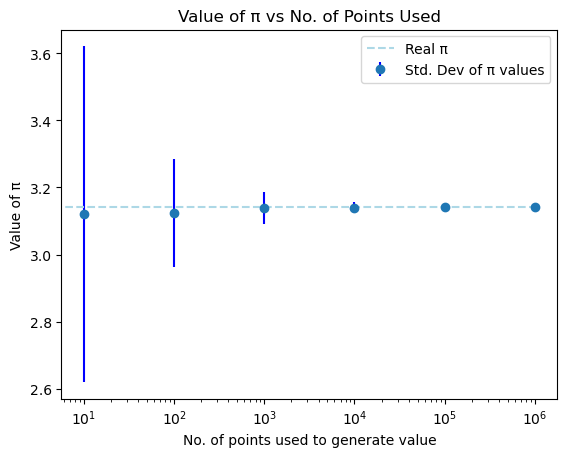

In [29]:
plt.plot()

point = plt.errorbar(n, mean, yerr=sd, ecolor='blue',fmt="o", label= "Std. Dev of π values" )

line = plt.hlines(np.pi,0,1000000, linestyle='--', colors='lightblue', label="Real π")

plt.xlabel('No. of points used to generate value')
plt.xscale('log')

plt.ylabel('Value of π')
plt.title('Value of π vs No. of Points Used')

plt.legend('upper right',handles=[line, point])
plt.show()

In [27]:
mean

[3.12, 3.1247999999999996, 3.13872, 3.139616, 3.1412664, 3.1413903600000004]

In [28]:
sd

[0.501054887212968,
 0.1604314183693456,
 0.048079933444213525,
 0.015692021412169938,
 0.005154043864772603,
 0.0016962254265279935]